<a href="https://colab.research.google.com/github/olimpiojunior/Dados-Goggle-Colaboratory/blob/master/Olimpio_Aula_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
avaliacoes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/ratings.csv")
avaliacoes.head(15)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


In [0]:
filmes["genres"].str.get_dummies('|').sum().sort_values(ascending = False)

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64

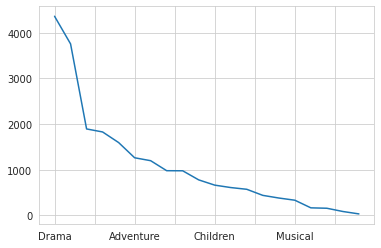

In [0]:
filmes["genres"].str.get_dummies('|').sum().sort_values(ascending = False).plot(kind = 'line')

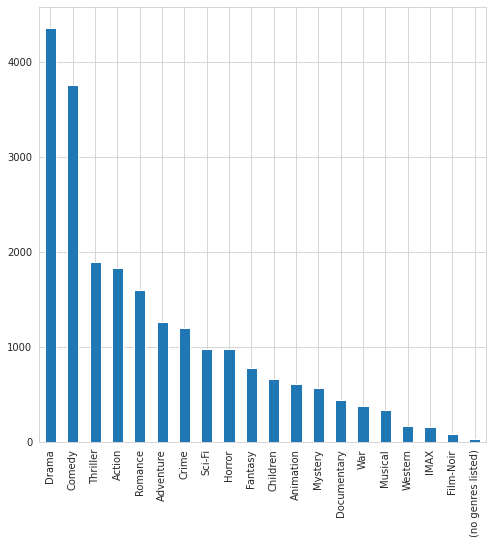

In [0]:
dados = filmes["genres"].str.get_dummies('|').sum().sort_values(ascending = False).plot(
    kind = 'bar',
    figsize = (8,8))
plt.show()

##Desafio 1: Colocar os thicks em 45°

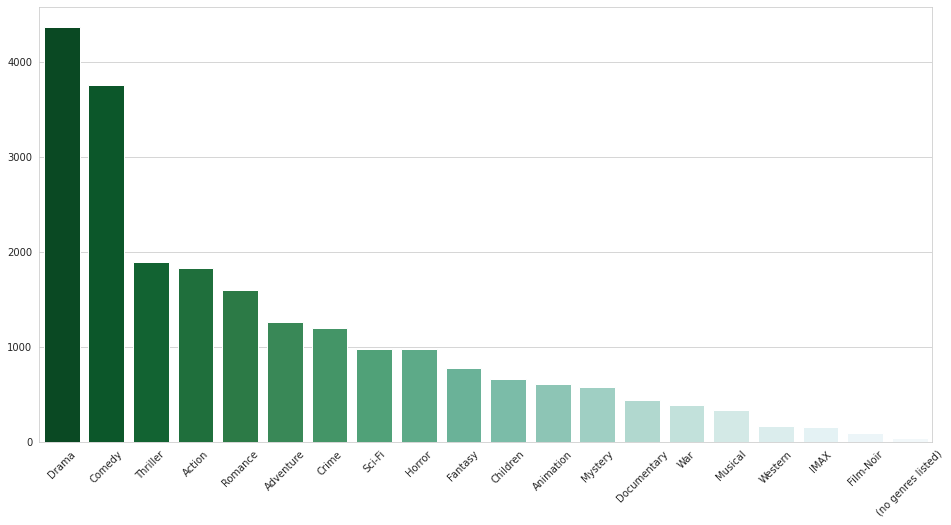

In [0]:
  filmes_por_genero = filmes["genres"].str.get_dummies('|').sum().sort_values(ascending = False)
  sns.set_style("whitegrid")
  plt.figure(figsize = (16, 8))
  sns.barplot(x = filmes_por_genero.index, y = filmes_por_genero.values, palette= "BuGn_r")
  plt.xticks(rotation = 45)
  plt.show()

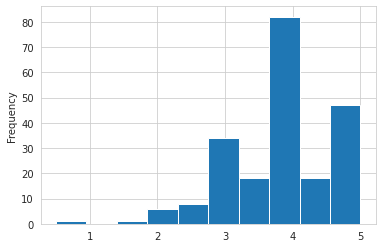

In [0]:
avaliacoes.query("movieId==1")["rating"].plot(kind = 'hist')

##Desafio 2: Comparar outros filmes com notas proximas e achar distribuições diferentes

In [0]:
def plot(n):
  notas_do_filme = avaliacoes.query(f'movieId=={n}')['rating']
  notas_do_filme.plot(kind = 'hist')
  plt.show()
  notas_do_filme.plot.box()
  plt.show()
  return notas_do_filme.describe()

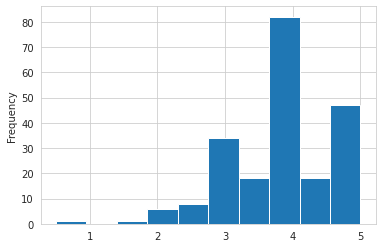

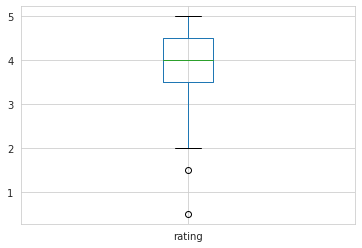

count    215.000000
mean       3.920930
std        0.834859
min        0.500000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: rating, dtype: float64

In [0]:
plot(1)

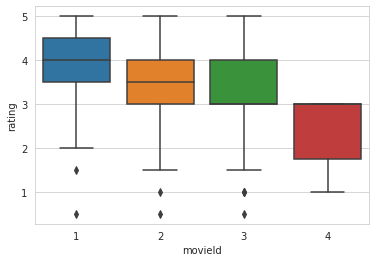

In [0]:
sns.boxplot(data = avaliacoes.query("movieId in [1,2,3,4]"), x = "movieId", y = "rating")

##Desafio 3: Criar boxplot dos 10 filmes com mais votos

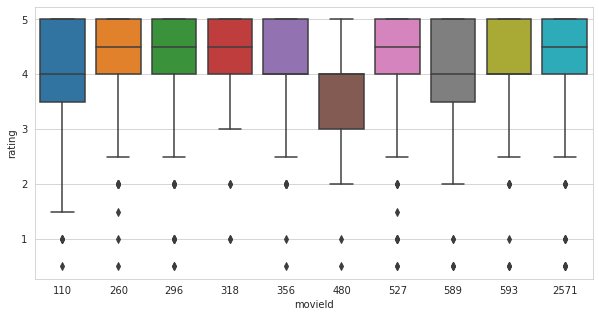

In [0]:
filmes_mais_votados = avaliacoes.groupby("movieId")["rating"].count()
filmes_mais_votados = filmes_mais_votados.sort_values(ascending=False).head(10)
list_mais_votados = filmes_mais_votados.index
plt.figure(figsize = (10, 5))
sns.boxplot(data = avaliacoes.query(f'movieId in @list_mais_votados'), x = "movieId", y = "rating")

##Desafio 4: O boxplot estar com tamanho adequado e com os nomes dos thicks

In [0]:
filmes["rating"] = avaliacoes["rating"]
filmes_mais_votados = filmes.groupby("movieId").count()
#filmes_mais_votados = filmes_mais_votados.sort_values(ascending=False)



#mais_votados_id = filmes_mais_votados.loc[:,['movieId', 'title']]
#list_mais_votados = mais_votados_id["movieId"].tolist()
#list_titulo = mais_votados_id["title"].tolist()
#plt.figure(figsize = (10, 5))
#plt.xticks(rotation = 90)
#sns.boxenplot(data = filmes.query(f'movieId in @list_mais_votados'), x = "title", y = "rating")

#top_10 = df_filmes.sort_values(by='totalVotos',ascending=False)[:10]
#top_10_ids = top_10.loc[:,['filmeId','titulo']]
#top_filme_id = top_10_ids["filmeId"].tolist()
#top_filme_titulo = top_10_ids["titulo"].tolist()

TypeError: ignored

##Desafio 5: Calcular moda, media, mediana dos filmes com notas mais proximas de 0.5, 3, e 4

##Desafio 6: Plotar o boxplot e o histograma um do outro (na mesma figura ou em figura distintas

##Desafio 7: Gráfico de notas médias por ano